<h1>Importing libraries</h1>

In [1]:
from __future__ import print_function
import keras
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd

Using TensorFlow backend.


<h1>importing dataset</h1>

In [2]:
data=pd.read_csv('fmnist.csv')

<h1>Reshaping the dataset</h1>

In [3]:
# input image dimensions
img_rows, img_cols = 28, 28

n_instances=10000 
#number of intances can effect performance and time in training 
X = data.iloc[0:n_instances,1:].values
Y = data.iloc[0:n_instances,0].values
test_size=0.20##test size

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=test_size,random_state=3)
xx = np.expand_dims(x_train, axis=0)
xt = np.expand_dims(x_test, axis=0)

x_train = xx.reshape(len(x_train),28,28,1)##reshaping dataset into 4 dimensions
x_test = xt.reshape(len(x_test),28,28,1)##reshaping dataset into 4 dimensions
   
input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 ##dividing each pixel by 255
x_test /= 255 
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
num_classes=10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (8000, 28, 28, 1)
8000 train samples
2000 test samples


<h1>Fitting model</h1>

In [4]:




##activation is the activation function in each layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
batch_size = 128
#The batch size is a hyperparameter that defines the number of samples to work through before updating 
#the internal model parameters.
epochs = 3 ##a number of epochs means how many times you go through your training set.
##more epochs can get more accuracy but it will need more time and performance

#By setting verbose 0, 1 or 2 you just say how do you want to 'see' the training progress for each epoch.
history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 8000 samples, validate on 2000 samples
Epoch 1/3
8000/8000 [==============================] - 11s 1ms/step - loss: 1.0803 - accuracy: 0.6263 - val_loss: 0.5960 - val_accuracy: 0.7740
Epoch 2/3
8000/8000 [==============================] - 10s 1ms/step - loss: 0.6102 - accuracy: 0.7857 - val_loss: 0.5207 - val_accuracy: 0.8100
Epoch 3/3
8000/8000 [==============================] - 10s 1ms/step - loss: 0.5213 - accuracy: 0.8121 - val_loss: 0.4481 - val_accuracy: 0.8235


<h1>Accuracy results</h1>

Test loss: 0.44807923460006716
Test accuracy: 0.8234999775886536


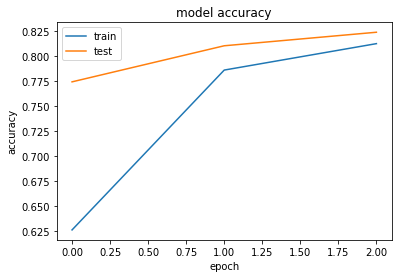

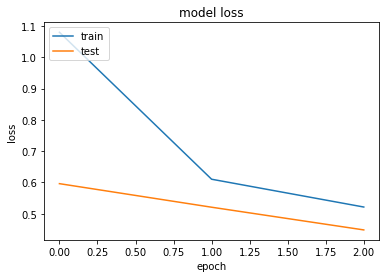

In [5]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1>Image Results</h1>

Predicted value:  8
Real value:  0


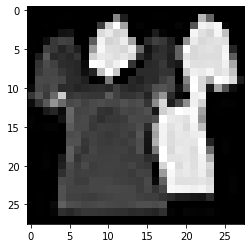

Predicted value:  8
Real value:  8


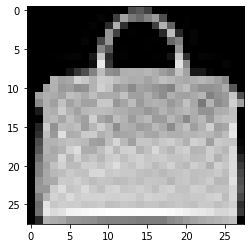

Predicted value:  8
Real value:  8


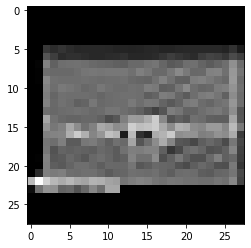

Predicted value:  4
Real value:  4


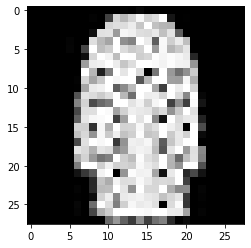

Predicted value:  6
Real value:  6


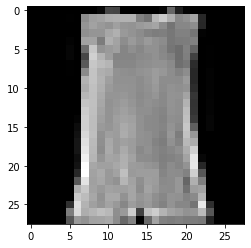

In [6]:
pred=model.predict(x_test)
numberof_images_display=5
n= np.random.randint(0,len(x_test),numberof_images_display)
for i in n:
    two_d = (np.reshape(x_test[i], (28, 28)) * 255).astype(np.uint8)
    print("Predicted value: ",np.argmax(pred[i],axis=None,out=None)) ##from binary to real value
    print("Real value: ",np.argmax(y_test[i], axis=None, out=None))
                                                
    plt.imshow(two_d, interpolation='nearest',cmap='gray')
    plt.show()